https://www.kaggle.com/mig555/mushroom-classification
https://www.kaggle.com/nirajvermafcb/comparing-various-ml-models-roc-curve-comparison
https://www.kaggle.com/ludobenistant/hr-analytics/kernels?sortBy=hotness&group=everyone&pageSize=20&language=Python&outputType=all&datasetId=358&startRow=0    

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
data=pd.read_csv('HR_comma_sep.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [35]:
data.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [37]:
data['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [38]:
data['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

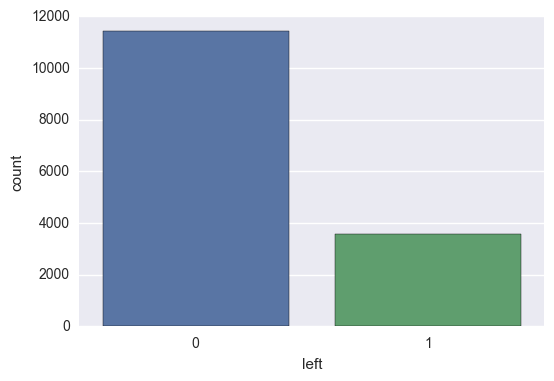

In [39]:
sns.set(style="darkgrid")
sns.countplot(x="left", data=data)

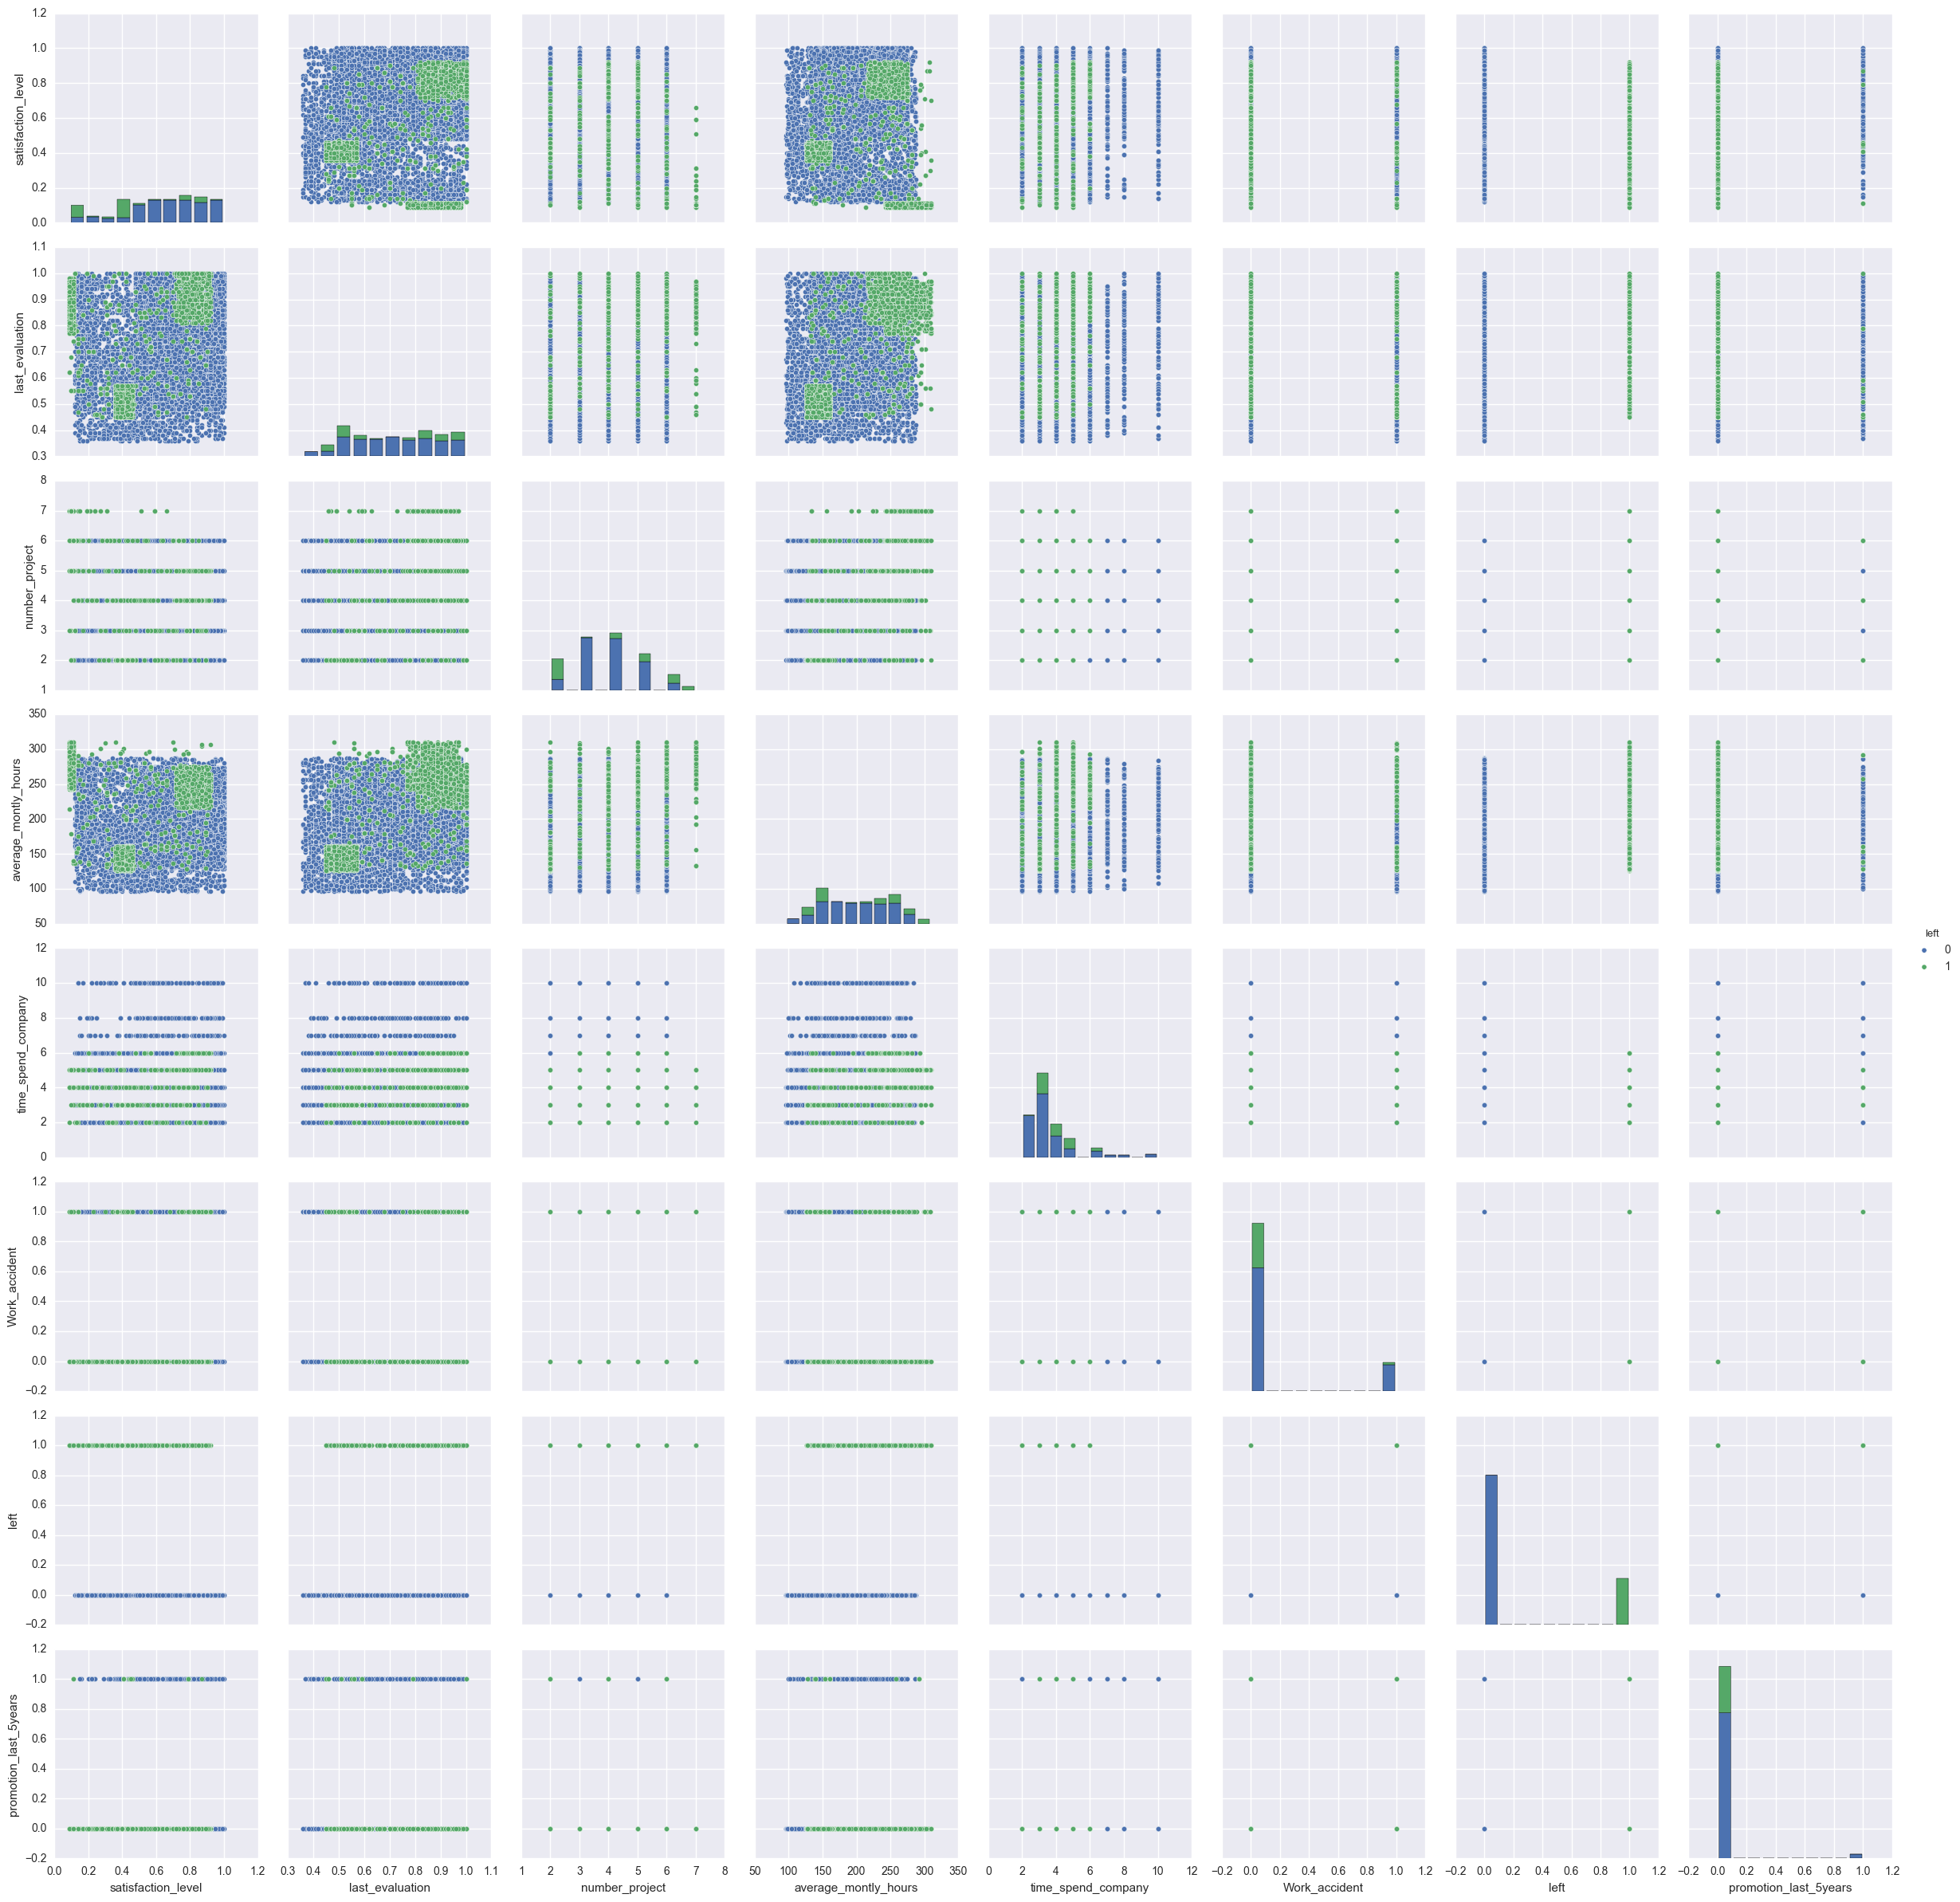

In [40]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
sns.pairplot(data, hue="left", size=3)

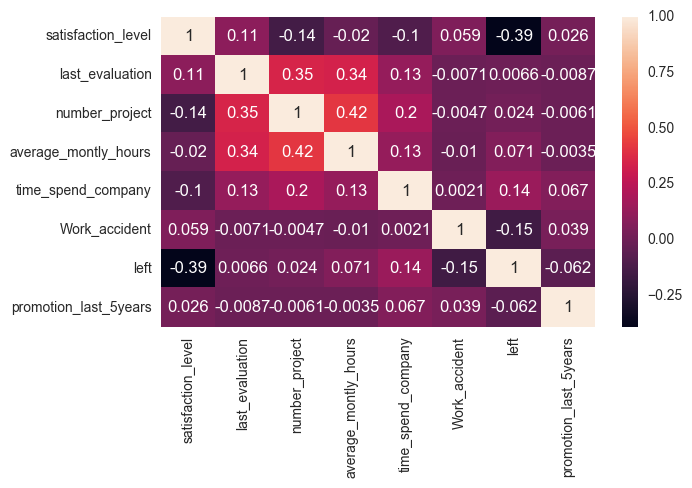

In [41]:
plt.figure(figsize=(7,4))
sns.heatmap(data.corr(),annot=True) #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [42]:
X=data.drop('left',axis=1)
Y=data['left']

In [43]:
#X_num=data.drop(['left','sales','salary'],axis=1)

In [44]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#cols=list(X_num.columns)
#X_scaled=pd.DataFrame(data=data)
#X_scaled[cols]=scaler.fit_transform(X[cols])
#X_scaled.head()

In [45]:
X_scaled_cat=pd.get_dummies(X)
X_scaled_cat.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.80,0.86,5,262,6,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.11,0.88,7,272,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.72,0.87,5,223,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.37,0.52,2,159,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled_cat,Y,test_size=0.3,random_state=0)

In [47]:

len(Y_train[Y_train==1])/len(Y_train[Y_train==0])

0.31797639969871955

In [48]:

len(Y_test[Y_test==1])/len(Y_test[Y_test==0])

0.29982668977469673

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier( class_weight="balanced",random_state=0)
rf.fit(X_train,Y_train)
predictions=rf.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report

In [51]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset:  0.952793834297


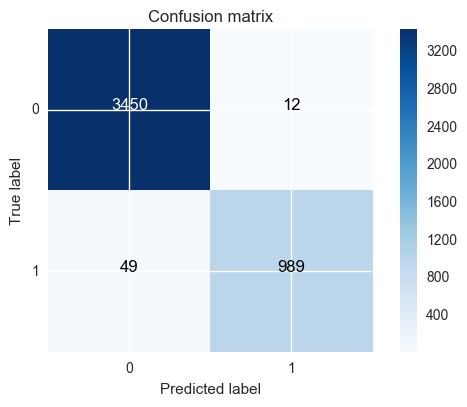

In [52]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test,predictions)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [53]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.974663814895


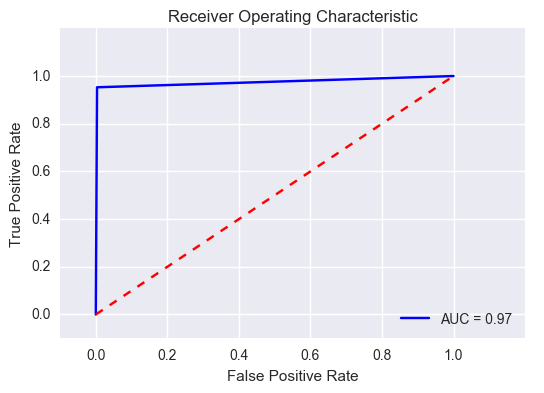

In [54]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [55]:
from sklearn.svm import SVC
clf = SVC(random_state=0,class_weight="balanced")
clf.fit(X_train,Y_train)
predictions=clf.predict(X_test)

Recall metric in the testing dataset:  0.931599229287


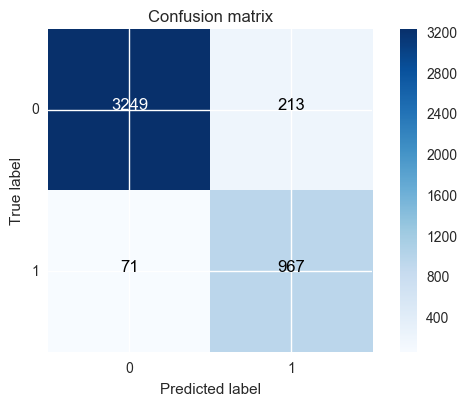

In [56]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test,predictions)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [58]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.935037049652


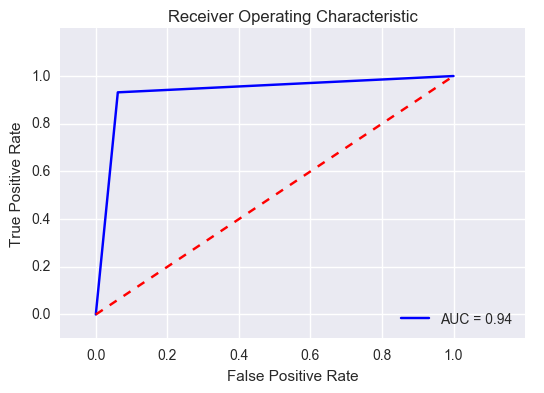

In [59]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')